In [10]:
import numpy as np
import matplotlib.pyplot as plt

$h(x) = \frac{w(0)}{\lambda}\left(e^{\lambda x} - 1\right) - \frac{1}{D \lambda} \int_0^x s(z)\left(e^{\lambda(x - z)} - 1\right) dz$

$w(0) = \frac{1}{D(e^{\lambda L} - 1)} \int_0^L s(z)\left(e^{\lambda(L - z)} - 1\right) dz$

where $\lambda = \frac{v}{D} $

Let
$
s(x) =
\begin{cases}
a, & 0 \le x \le b, \\
0, & \text{otherwise}
\end{cases}
$


$\int_0^x s(z)\left(e^{\lambda(x - z)} - 1\right)dz
= a \int_0^{\min(x,b)} \left(e^{\lambda(x - z)} - 1\right)dz$

Let $ m = \min(x, b)$

$
\begin{aligned}
\int_0^{m} \left(e^{\lambda(x - z)} - 1\right)dz
&= e^{\lambda x}\int_0^{m} e^{-\lambda z}dz - m \\
&= e^{\lambda x}\frac{1 - e^{-\lambda m}}{\lambda} - m
\end{aligned}
$

Hence,

$
\int_0^x s(z)\left(e^{\lambda(x - z)} - 1\right)dz
= a\left[\frac{e^{\lambda x}(1 - e^{-\lambda m})}{\lambda} - m\right]
$


Similarly,

$\int_0^L s(z)\left(e^{\lambda(L - z)} - 1\right)dz
= a\int_0^b \left(e^{\lambda(L - z)} - 1\right)dz
= a\left[\frac{e^{\lambda L}(1 - e^{-\lambda b})}{\lambda} - b\right]$

Thus $w(0) = \frac{a}{D(e^{\lambda L} - 1)}\left[\frac{e^{\lambda L}(1 - e^{-\lambda b})}{\lambda} - b\right]$


$h(x) = \frac{w(0)}{\lambda}(e^{\lambda x} - 1)- \frac{a}{D \lambda}\left[\frac{e^{\lambda x}(1 - e^{-\lambda m})}{\lambda} - m\right], \quad m = \min(x,b)$

In [11]:
def h(x, a, b, D, v, L):
    t = v / D #lambda
    m = np.minimum(x, b)

    w0 = (a / (D * (np.exp(t * L) - 1))) * ((np.exp(t * L) * (1 - np.exp(-t * b))) / t - b)

    h_val = (w0 / t) * (np.exp(t * x) - 1) - (a / (D * t)) * ((np.exp(t * x) * (1 - np.exp(-t * m))) / t - m)
    return h_val

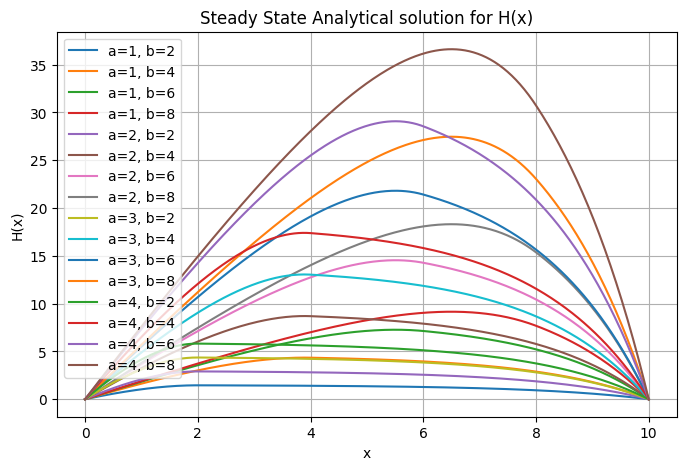

In [13]:
D = 1
v = 0.5
L = 10.0

a_values = [1, 2, 3, 4]
b_values = [2, 4, 6, 8]
x_vals = np.linspace(0, L, 400)

plt.figure(figsize=(8, 5))

for a in a_values:
    for b in b_values:
        h_vals = h(x_vals, a, b, D, v, L)
        plt.plot(x_vals, h_vals, label=f'a={a}, b={b}')

plt.xlabel('x')
plt.ylabel('H(x)')
plt.title('Steady State Analytical solution for H(x)')
plt.legend()
plt.grid(True)
plt.show()